# **Proposta de Trabalho 4 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:** Júlio César de Paula Ferreira
### **Matrícula:** 2020054609


### **Tema:** Regressão - Previsão de preço de imóveis
### **Base de dados:** (https://www.kaggle.com/code/statchaitya/king-county-house-sales-prediction)


In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import re
!pip install haversine
from haversine import haversine
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**2. Data understanding (Entendimento dos dados)**


Descrição e filtragem da base de dados, são analisados 28 atributos e 100000 entradas de dados

In [ ]:
#Carregando a base de dados

In [ ]:
df = pd.read_csv('train.csv',sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Pela descrição dos dados, é possível ver que no geral a base de dados está limpa e não possui muitos outliers relevantes, alguns itens desviam da média (como número de quartos e banheiros), entretanto tal comportamento é esperado para o tipo de dados trabalhado. Entretanto é interessante alterar a data, para a menor data será atribuido 0 e para as outras a contagem de dias a partir da menor data.

In [ ]:
from datetime import datetime

In [ ]:
df2 = (df['date'].astype(str).str[0:8])
X = df2.values
for i in range(len(X)):
  X[i] = datetime.strptime(X[i], '%Y%m%d')
min = df2.min()
min = datetime.strptime(m, '%Y%m%d')
X = (X - min)
for i in range(len(X)):
  X[i] = X[i].days
df['date'] = X

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdfa382e0>,
      dtype=object)

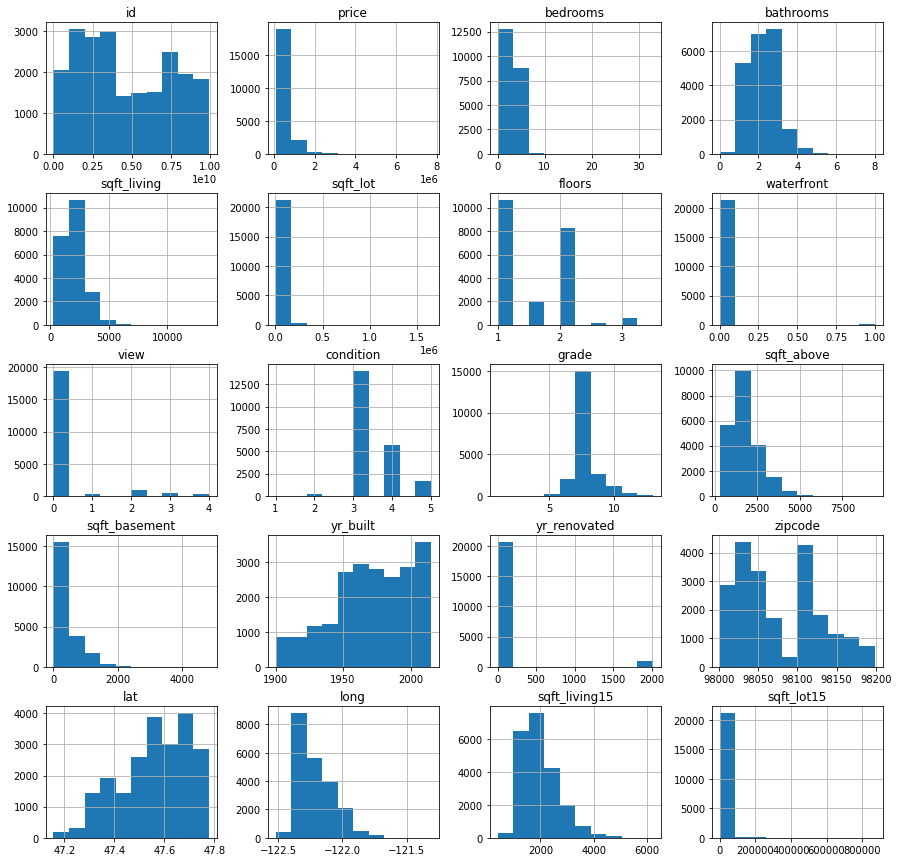

In [ ]:
df.hist(figsize=(15,15))

A matriz de correlações

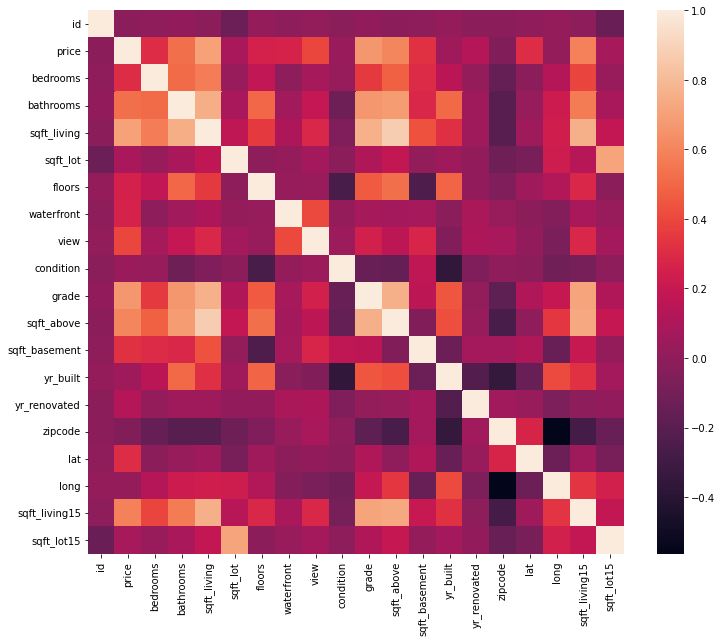

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

Alguns valores interessantes surgem da visualização. A vista por exemplo impacta bastante no preço, mas a diferença de preço entre as vistas intermediárias não é significativa

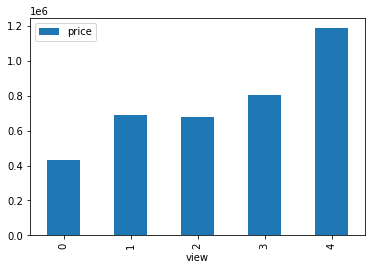

In [ ]:
df[['price','view']].groupby('view').median().plot.bar(y='price')

Em comparação, a nota da construção da casa possui uma relação muito maior com os preços

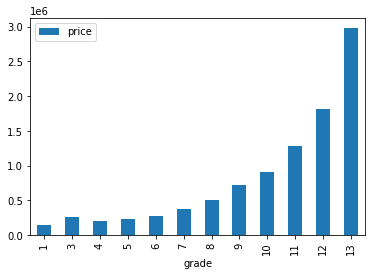

In [ ]:
df[['price','grade']].groupby('grade').median().plot.bar(y='price')

A quantidade de andares da casa também não é muito relevante para a diferenciação do preço

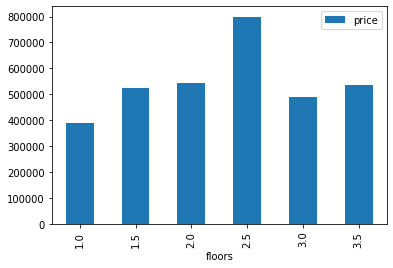

In [ ]:
df[['price','floors']].groupby('floors').median().plot.bar(y='price')

A casa ter vista para o mar entretanto é um fator de peso muito grande no preço

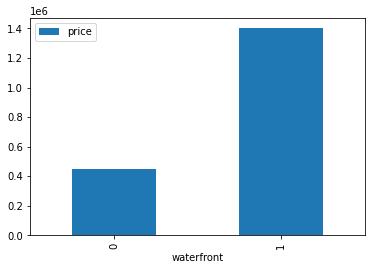

In [ ]:
df[['price','waterfront']].groupby('waterfront').median().plot.bar(y='price')

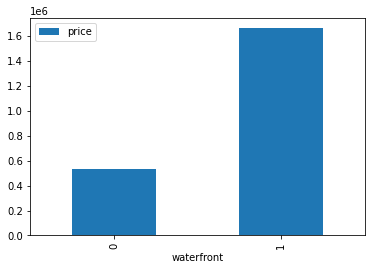

In [ ]:
df[['price','waterfront']].groupby('waterfront').mean().plot.bar(y='price')

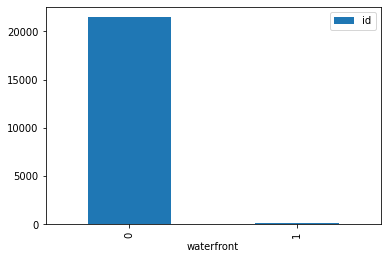

In [ ]:
df[['id','waterfront']].groupby('waterfront').count().plot.bar()

Embora existam extremos, o número de banheiros e quartos não parece ser uma informação tão determinante para o valor da casa

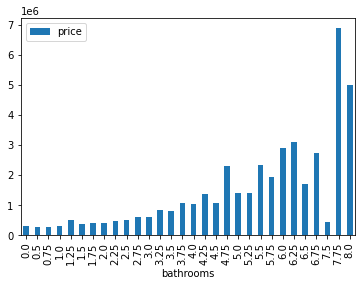

In [ ]:
df[['price','bathrooms']].groupby('bathrooms').median().plot.bar(y='price')

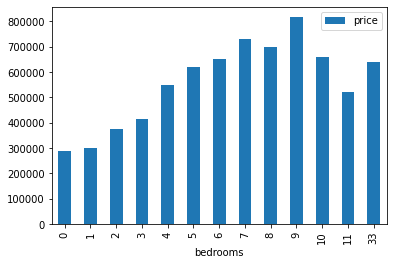

In [ ]:
df[['price','bedrooms']].groupby('bedrooms').median().plot.bar(y='price')

##**3. Data preparation (Preparação dos dados)**

As visualizações ajudam a entender a dinâmica dos dados, como esperado, existem muitos valores outliers mas ainda dentro do previsto devido à variação de renda das pessoas que buscam comprar as casas. O único dado inesperado é o ano de renovação. A informação está em anos mas o 0 é uma informação binária, portanto será criada uma escala levando em consideração (Ano de renovação - ano de construção) para normalizar os dados

In [ ]:
df['yr_renovated'][df['yr_renovated']==0] = 2016
df['yr_renovated'] = (2015-df['yr_renovated'])
df['yr_renovated'][df['yr_renovated']==-1] = 100
scaler = MinMaxScaler()
df[['yr_renovated']] = scaler.fit_transform(df[['yr_renovated']])

<ipython-input-176-1bf00e714abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_renovated'][df['yr_renovated']==0] = 2016
<ipython-input-176-1bf00e714abf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_renovated'][df['yr_renovated']==-1] = 100


In [ ]:
df.head()

Outro fator interessante é que por estarem divididas, a latitude e a longitude tem baixa correlação com o zipcode, o que não deveria acontecer. Portanto eles serão substituídos pela distância normalizada de cada casa para a latitude/longitude (0,0) usando a fórmula de Harvesine.

In [ ]:
df['lat_long'] = 0

In [ ]:
def lat_long_normalize(row):
  x = (0,0)
  y = (row['lat'],row['long'])
  return haversine(x,y)

In [ ]:
df['lat_long'] = df.apply(lambda row: lat_long_normalize(row), axis=1)
df['lat_long'] = scaler.fit_transform(df[['lat_long']])*100

In [ ]:
df = df.drop(columns=['lat','long'])

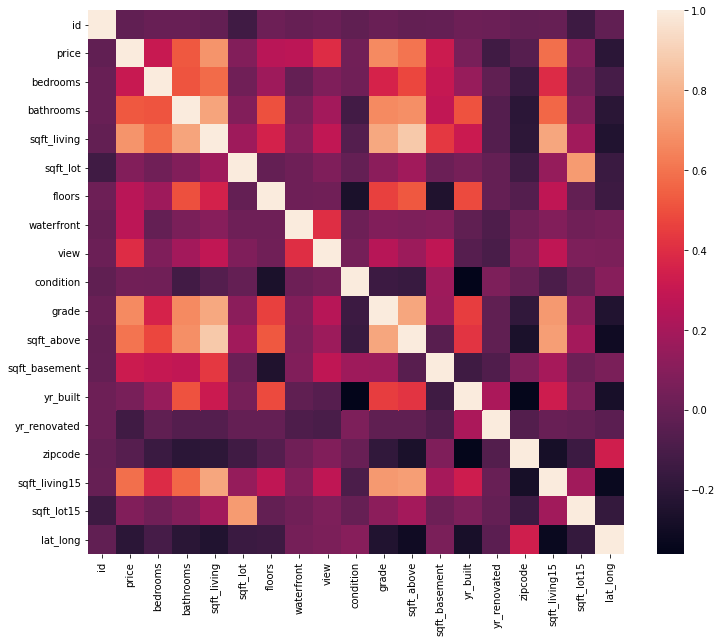

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

A base de dados é dividida em 80% de treino e 20% de teste, os dados são então transformados em arrays

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['id','price']),df.price,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(17290, 18)

In [ ]:
def norm(x):
  return ((x - x.mean()) / x.std())

In [ ]:
X_train,X_test = np.array(X_train).astype('float32'),np.array(X_test).astype('float32')

In [ ]:
y_train,y_test = np.array(y_train).astype('float32'),np.array(y_test).astype('float32')

In [ ]:
X_train.shape

(17290, 18)

##**4. Modeling (Modelagem)**

A tunagem de hiperparâmetros é realizada com Grid Search, o algoritmo utilizado para o modelo é o Random Forest Classifier, que apresenta bons resultados para esse tipo de base de dados

In [ ]:
param_grid = {
    'n_estimators': [10,20,50,100,150],
    'max_features': ['None','sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10,12],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [ ]:
cv = GridSearchCV(estimator=RandomForestRegressor(random_state=42),scoring ='r2',param_grid=param_grid, cv=2,verbose=3)
cv.fit(X_train, y_train)

Fitting 2 folds for each of 360 candidates, totalling 720 fits
[CV 1/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=10;, score=nan total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=10;, score=nan total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=20;, score=nan total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=20;, score=nan total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=50;, score=nan total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=50;, score=nan total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=2, max_features=None, n_estimators=100;, score=nan total time=   0.0s

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='r2', verbose=3)

In [ ]:
cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 150}

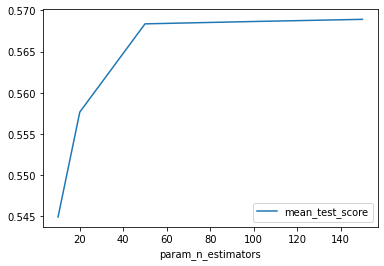

In [ ]:
df_results = pd.DataFrame(cv.cv_results_)
df_results[['param_n_estimators','mean_test_score']].groupby('param_n_estimators').mean().plot()

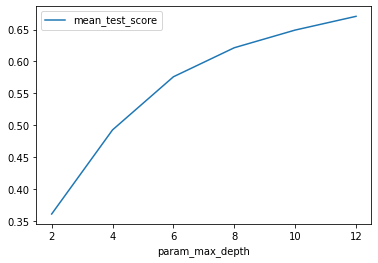

In [ ]:
df_results[['param_max_depth','mean_test_score']].groupby('param_max_depth').mean().plot()

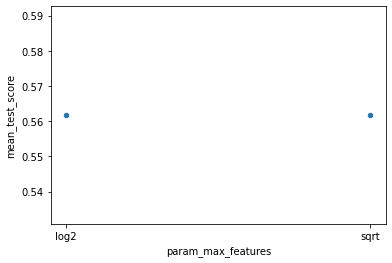

In [ ]:
df_results[['param_max_features','mean_test_score']].groupby(
                                        'param_max_features').mean().reset_index().plot.scatter(x='param_max_features',y='mean_test_score')

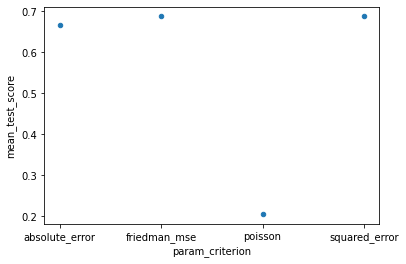

In [ ]:
df_results[['param_criterion','mean_test_score']].groupby(
    'param_criterion').mean().reset_index().plot.scatter(x='param_criterion',y='mean_test_score')

In [ ]:
model = RandomForestRegressor(**cv.best_params_)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=12,
                      max_features='sqrt', n_estimators=150)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rank = pd.DataFrame(columns=[df.drop(columns=['id','price']).columns])

In [ ]:
rank = rank.append(pd.DataFrame(model.feature_importances_.reshape(1,-1), columns=list(rank)), ignore_index=True)

In [ ]:
rank = rank.sort_values(by=0,axis = 1, ascending = False)

In [ ]:
names = np.array(rank.columns)
for i in range(len(names)):
  names[i] = names [i][0]

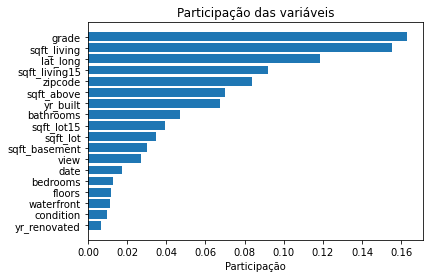

In [ ]:
fig, ax = plt.subplots()
ax.barh(names,rank.loc[0], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Participação')
ax.set_title('Participação das variáveis')

plt.show()

##**5. Evaluation (Validação) e Resultados**


O R² do modelo chegou chegou a 0.80, alguns valores ficaram um pouco fora do esperado, com a razão entre previsão e esperado chegando a 0.3x e 3.7x, entretanto no geral os dados ficaram bem próximos do esperado, como pode ser visto nos histogramas e no gráfico de previsão/esperado

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8041129063721112

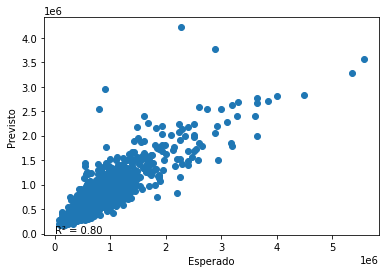

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Esperado")
plt.ylabel("Previsto")
plt.text(0,0,"R² = 0.80",fontsize=10)
plt.show()

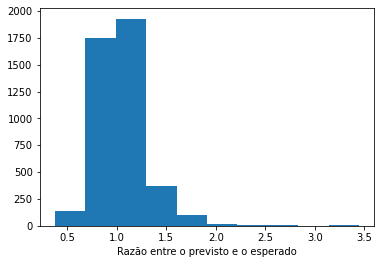

In [ ]:
plt.hist(np.abs(y_pred/y_test))
plt.xlabel("Razão entre o previsto e o esperado")
plt.show()

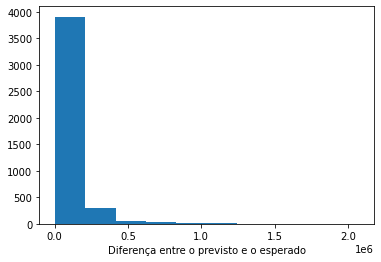

In [ ]:
plt.hist(np.abs(y_pred-y_test))
plt.xlabel("Diferença entre o previsto e o esperado")
plt.show()